In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [12]:
retail = pd.read_csv('/content/On_Ret.csv', sep=",", encoding="ISO-8859-1", header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
retail.shape

(999, 8)

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    999 non-null    object 
 1   StockCode    999 non-null    object 
 2   Description  998 non-null    object 
 3   Quantity     999 non-null    int64  
 4   InvoiceDate  999 non-null    object 
 5   UnitPrice    999 non-null    float64
 6   CustomerID   998 non-null    float64
 7   Country      999 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [15]:
retail.describe()
df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

,0
InvoiceNo,0.0
StockCode,0.0
Description,0.1
Quantity,0.0
InvoiceDate,0.0
UnitPrice,0.0
CustomerID,0.1
Country,0.0


In [16]:
retail = retail.dropna()
retail.shape

(998, 8)

In [17]:
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [18]:
retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12431.0,358.25
1,12583.0,855.86
2,12791.0,192.60
3,12838.0,390.79
4,13047.0,366.63


In [19]:
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12431.0,14
1,12583.0,20
2,12791.0,2
3,12838.0,59
4,13047.0,17


In [20]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12431.0,358.25,14
1,12583.0,855.86,20
2,12791.0,192.60,2
3,12838.0,390.79,59
4,13047.0,366.63,17


In [21]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [22]:
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2010-12-01 12:43:00')

In [23]:
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0 days 04:17:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0 days 04:17:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0 days 04:17:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0 days 04:17:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0 days 04:17:00


In [24]:
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12431.0,0 days 02:40:00
1,12583.0,0 days 03:58:00
2,12791.0,0 days 01:16:00
3,12838.0,0 days 00:46:00
4,13047.0,0 days 04:08:00


In [25]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12431.0,0
1,12583.0,0
2,12791.0,0
3,12838.0,0
4,13047.0,0


In [26]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12431.0,358.25,14,0
1,12583.0,855.86,20,0
2,12791.0,192.60,2,0
3,12838.0,390.79,59,0
4,13047.0,366.63,17,0


Text(0.5, 0, 'Attributes')

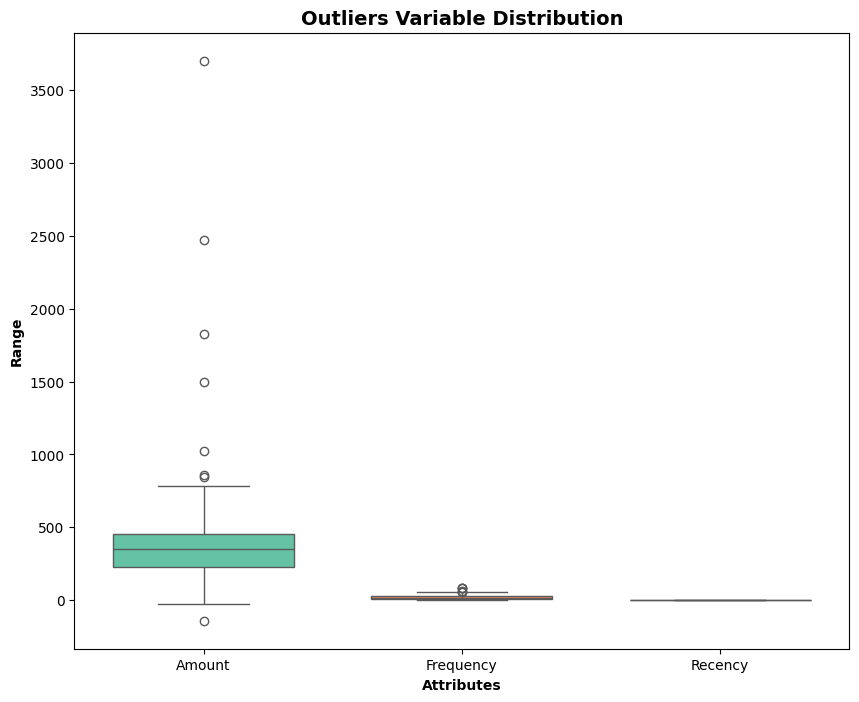

In [27]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [28]:
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [29]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(48, 3)

In [30]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.234814,-0.295733,0.0
1,0.532672,-0.034472,0.0
2,-0.490303,-0.818256,0.0
3,-0.184626,1.663726,0.0
4,-0.221889,-0.165103,0.0


In [31]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [32]:
kmeans.labels_

array([3, 3, 0, 1, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 1, 0, 3, 1, 3, 0, 0,
       3, 0, 1, 3, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 1, 1, 0,
       0, 1, 3, 0], dtype=int32)

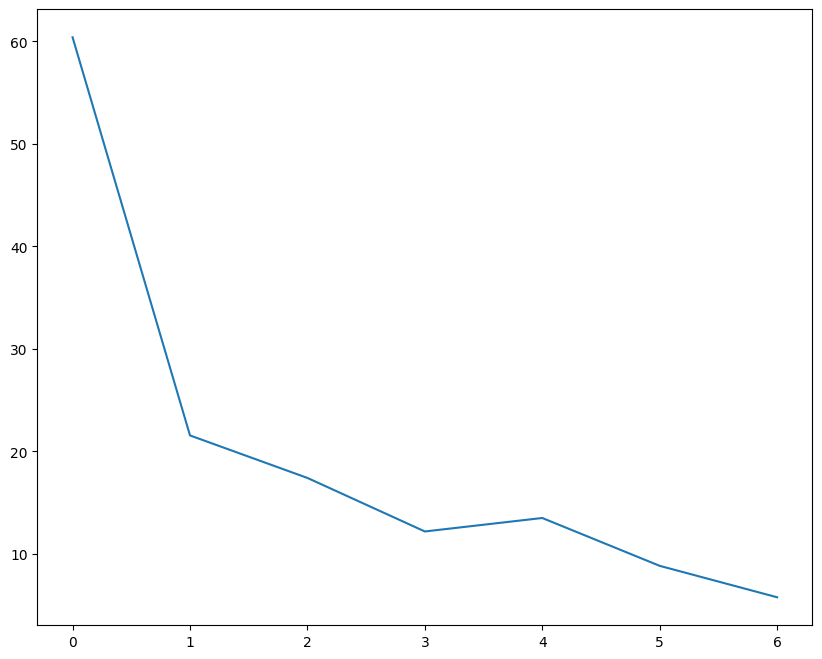

In [33]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [34]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



For n_clusters=2, the silhouette score is 0.5480147790628394
For n_clusters=3, the silhouette score is 0.6650397772463646
For n_clusters=4, the silhouette score is 0.6345078388249855
For n_clusters=5, the silhouette score is 0.41929331295475897
For n_clusters=6, the silhouette score is 0.4246648912896029
For n_clusters=7, the silhouette score is 0.42988976595935363
For n_clusters=8, the silhouette score is 0.45423982290284776


In [35]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [36]:
 kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0], dtype=int32)

In [37]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12431.0,358.25,14,0,0
1,12583.0,855.86,20,0,0
2,12791.0,192.60,2,0,0
3,12838.0,390.79,59,0,1
4,13047.0,366.63,17,0,0


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

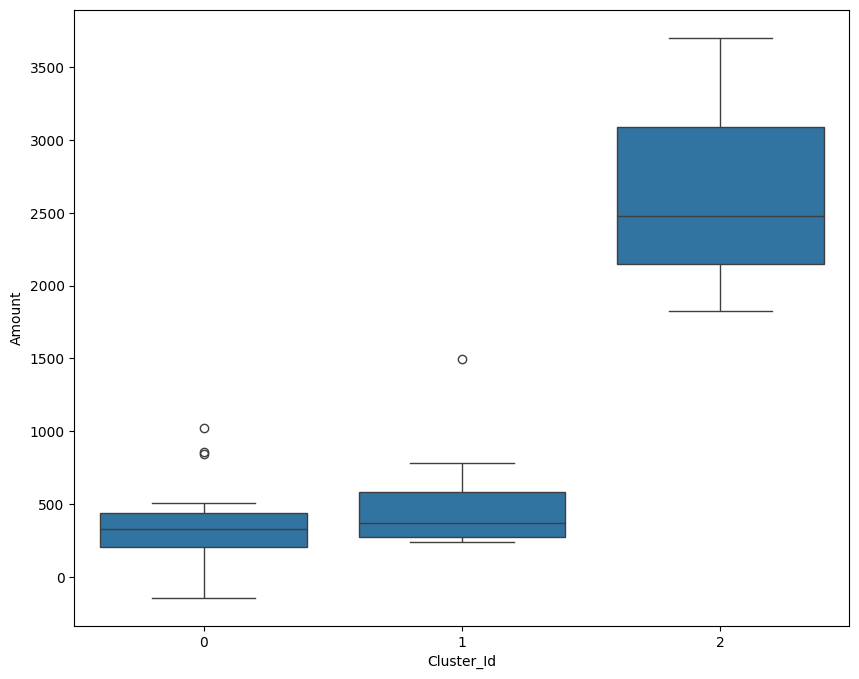

In [38]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

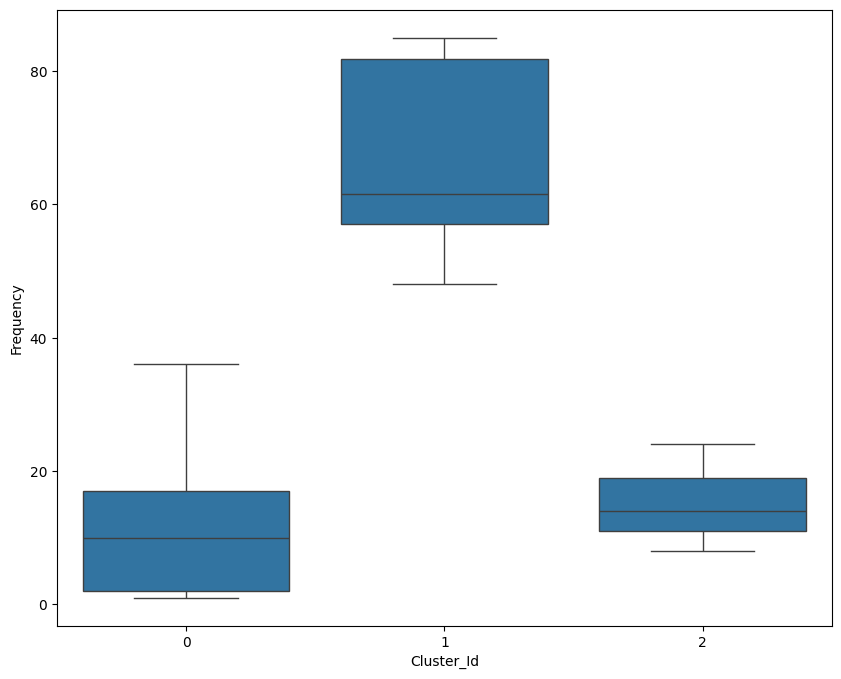

In [39]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

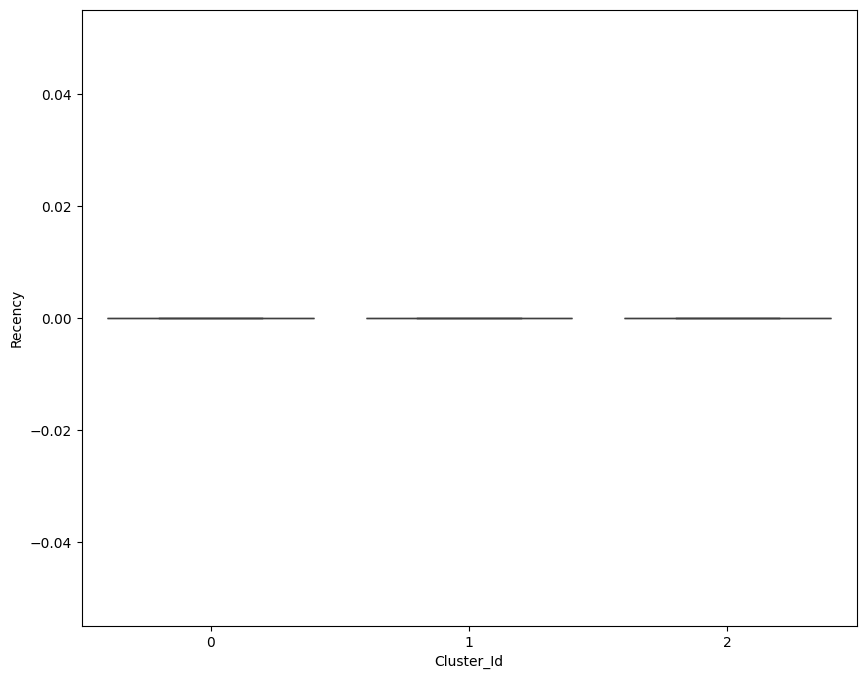

In [40]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

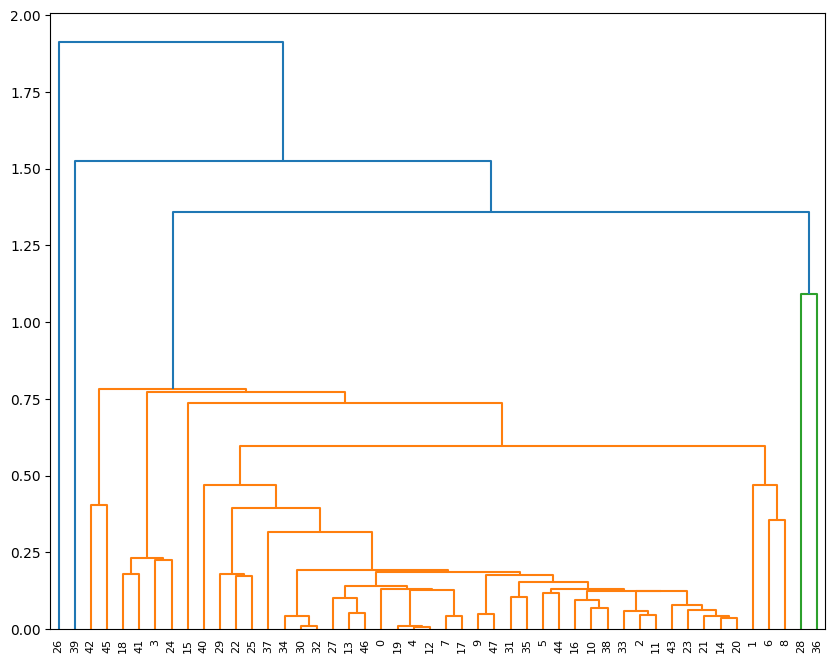

In [41]:
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

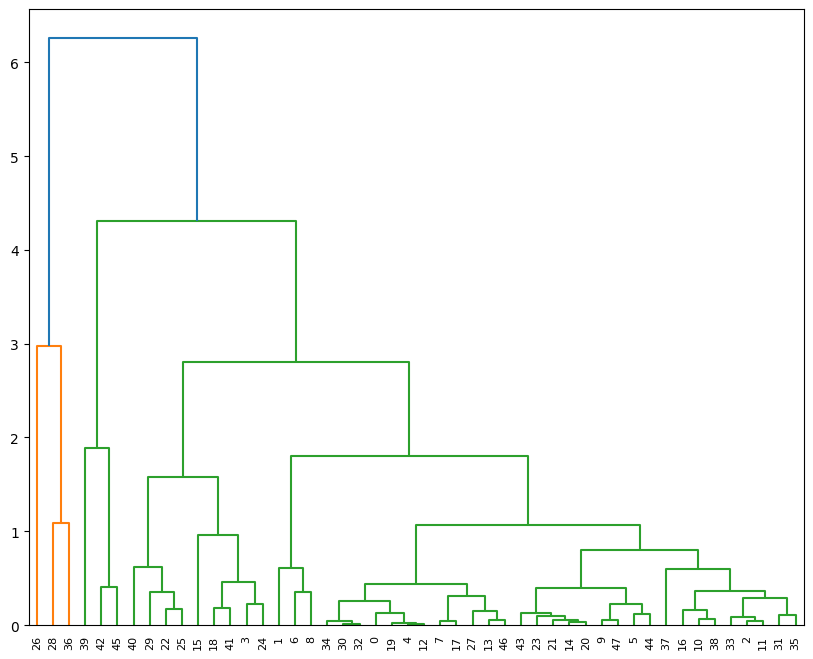

In [42]:
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

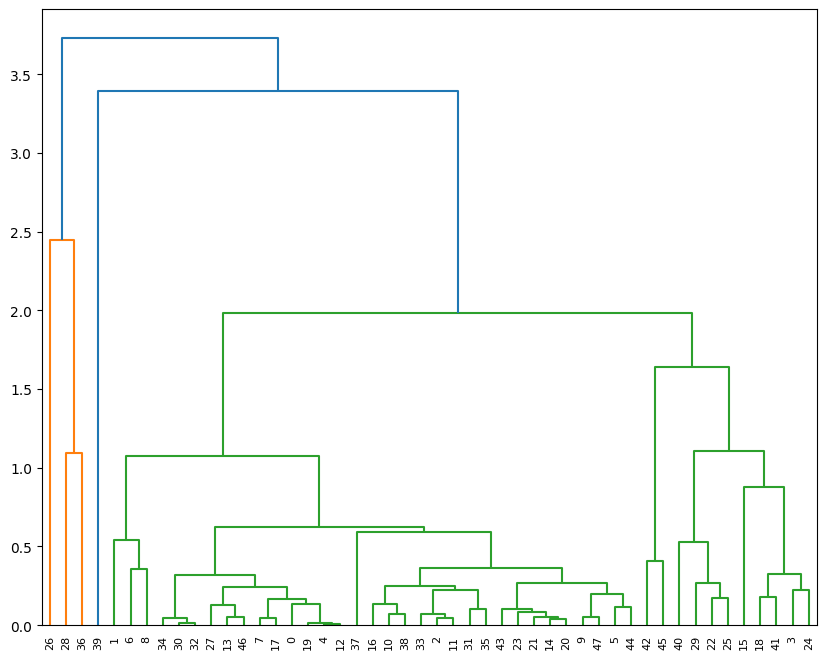

In [43]:
mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [44]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0])

In [45]:
rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12431.0,358.25,14,0,0,0
1,12583.0,855.86,20,0,0,0
2,12791.0,192.60,2,0,0,0
3,12838.0,390.79,59,0,1,0
4,13047.0,366.63,17,0,0,0


<Axes: xlabel='Cluster_Labels', ylabel='Amount'>

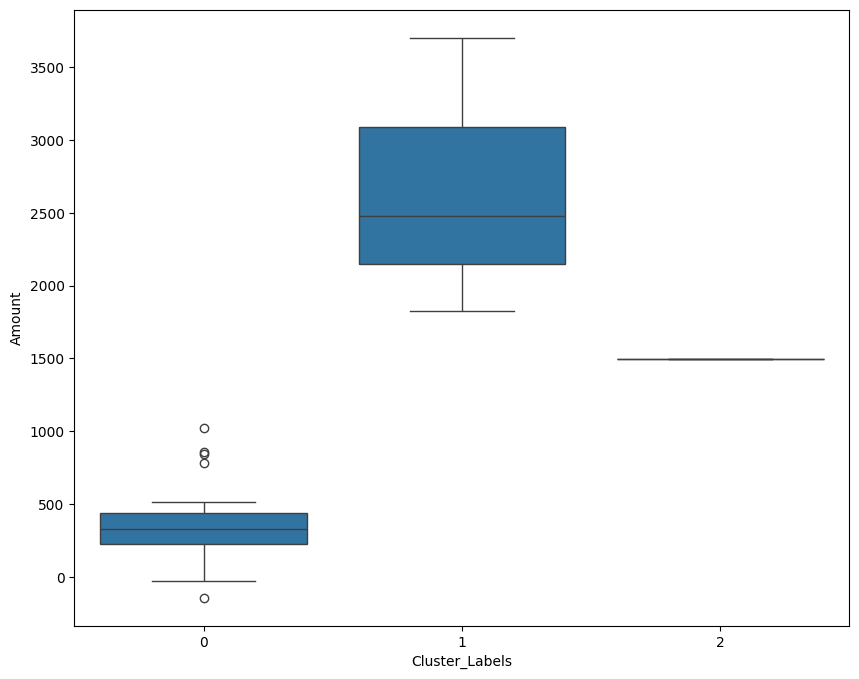

In [46]:
sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Labels', ylabel='Frequency'>

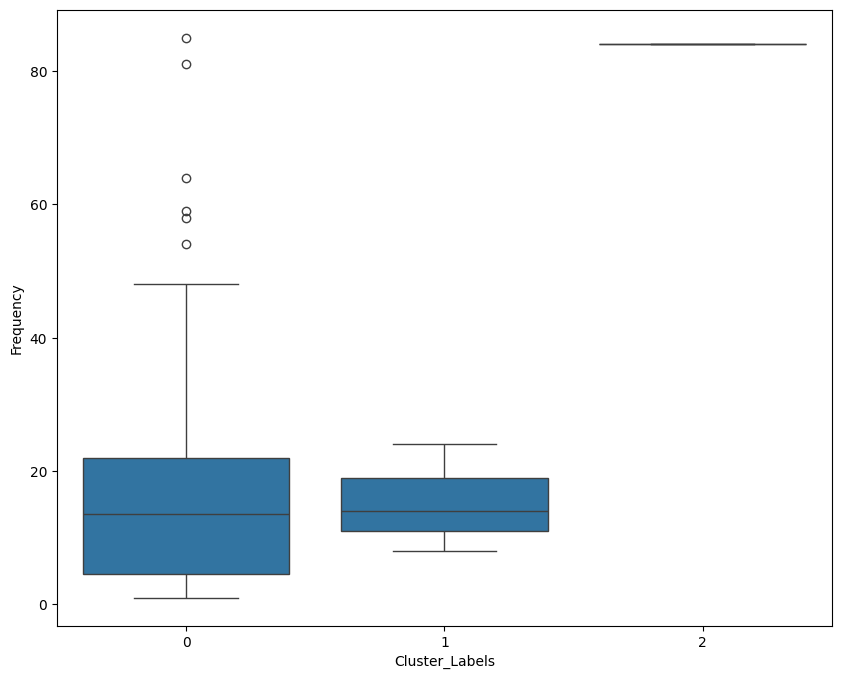

In [47]:
sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Labels', ylabel='Recency'>

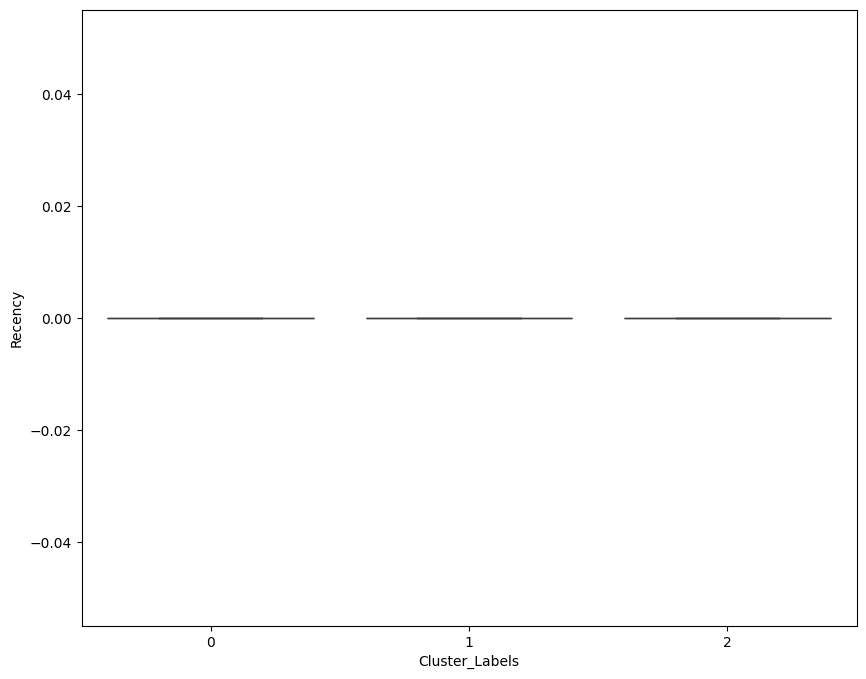

In [48]:
sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)